In [1]:
# 📦 Phase 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# ✅ Load Dataset
df = pd.read_csv("OnlineNewsPopularity.csv")  # Adjust path as needed

# ✂️ Clean Column Names (Remove Spaces)
df.columns = [col.strip() for col in df.columns]

# 👁️ Preview Data
df.head()


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [2]:
# Shape and Types
print(f"Shape: {df.shape}")
print(df.dtypes.value_counts())

# Missing values?
print(df.isnull().sum().sort_values(ascending=False))

# Summary statistics
df.describe()


Shape: (39644, 61)
float64    59
object      1
int64       1
Name: count, dtype: int64
url                          0
weekday_is_monday            0
weekday_is_wednesday         0
weekday_is_thursday          0
weekday_is_friday            0
                            ..
kw_min_avg                   0
kw_max_avg                   0
kw_avg_avg                   0
self_reference_min_shares    0
shares                       0
Length: 61, dtype: int64


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


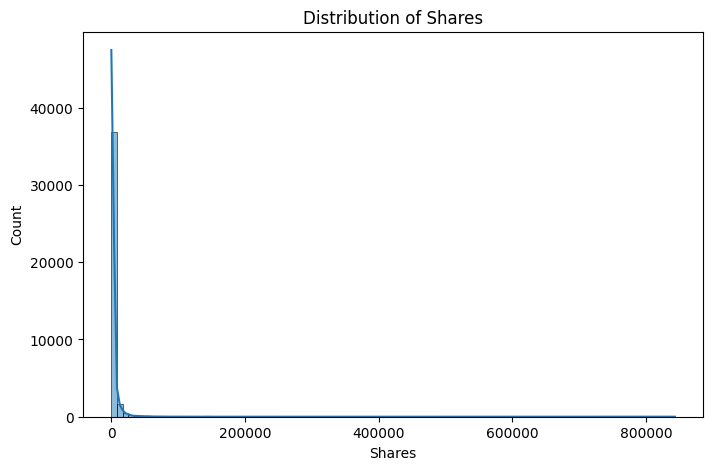

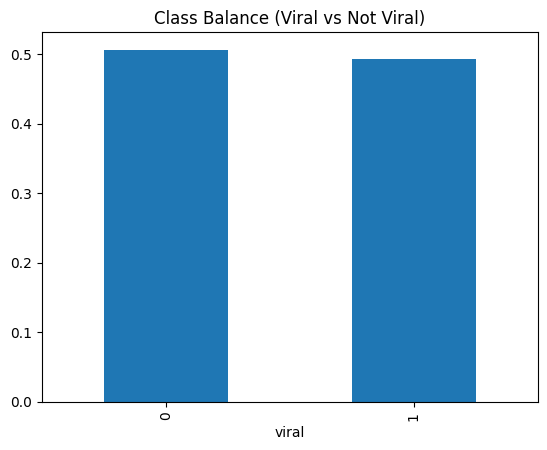

In [3]:
# Distribution of Target Variable: shares
plt.figure(figsize=(8,5))
sns.histplot(df['shares'], bins=100, kde=True)
plt.title("Distribution of Shares")
plt.xlabel("Shares")
plt.show()

# Convert Target to Binary: Viral = 1 if shares > 1400
df['viral'] = (df['shares'] > 1400).astype(int)

# Class balance check
df['viral'].value_counts(normalize=True).plot(kind='bar', title='Class Balance (Viral vs Not Viral)')
plt.show()


In [4]:
df.columns = df.columns.str.strip()
post_pub_features = [
    'url', 'shares',
    'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess',  # ✅ fixed typo
    'kw_min_min', 'kw_max_min', 'kw_avg_min',
    'kw_min_max', 'kw_max_max', 'kw_avg_max',
    'kw_min_avg', 'kw_max_avg', 'kw_avg_avg'
]


# ✅ Step 1: Create 'viral' BEFORE dropping 'shares'
if 'viral' not in df.columns and 'shares' in df.columns:
    df['viral'] = (df['shares'] > 1400).astype(int)

# ✅ Step 2: Drop post-publication features (including 'shares') AFTER creating 'viral'
df.drop(columns=[col for col in post_pub_features if col in df.columns], inplace=True)


In [5]:
print(df.columns)
print("shares" in df.columns)  # Should print False
print("viral" in df.columns)   # Should print True

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_pola

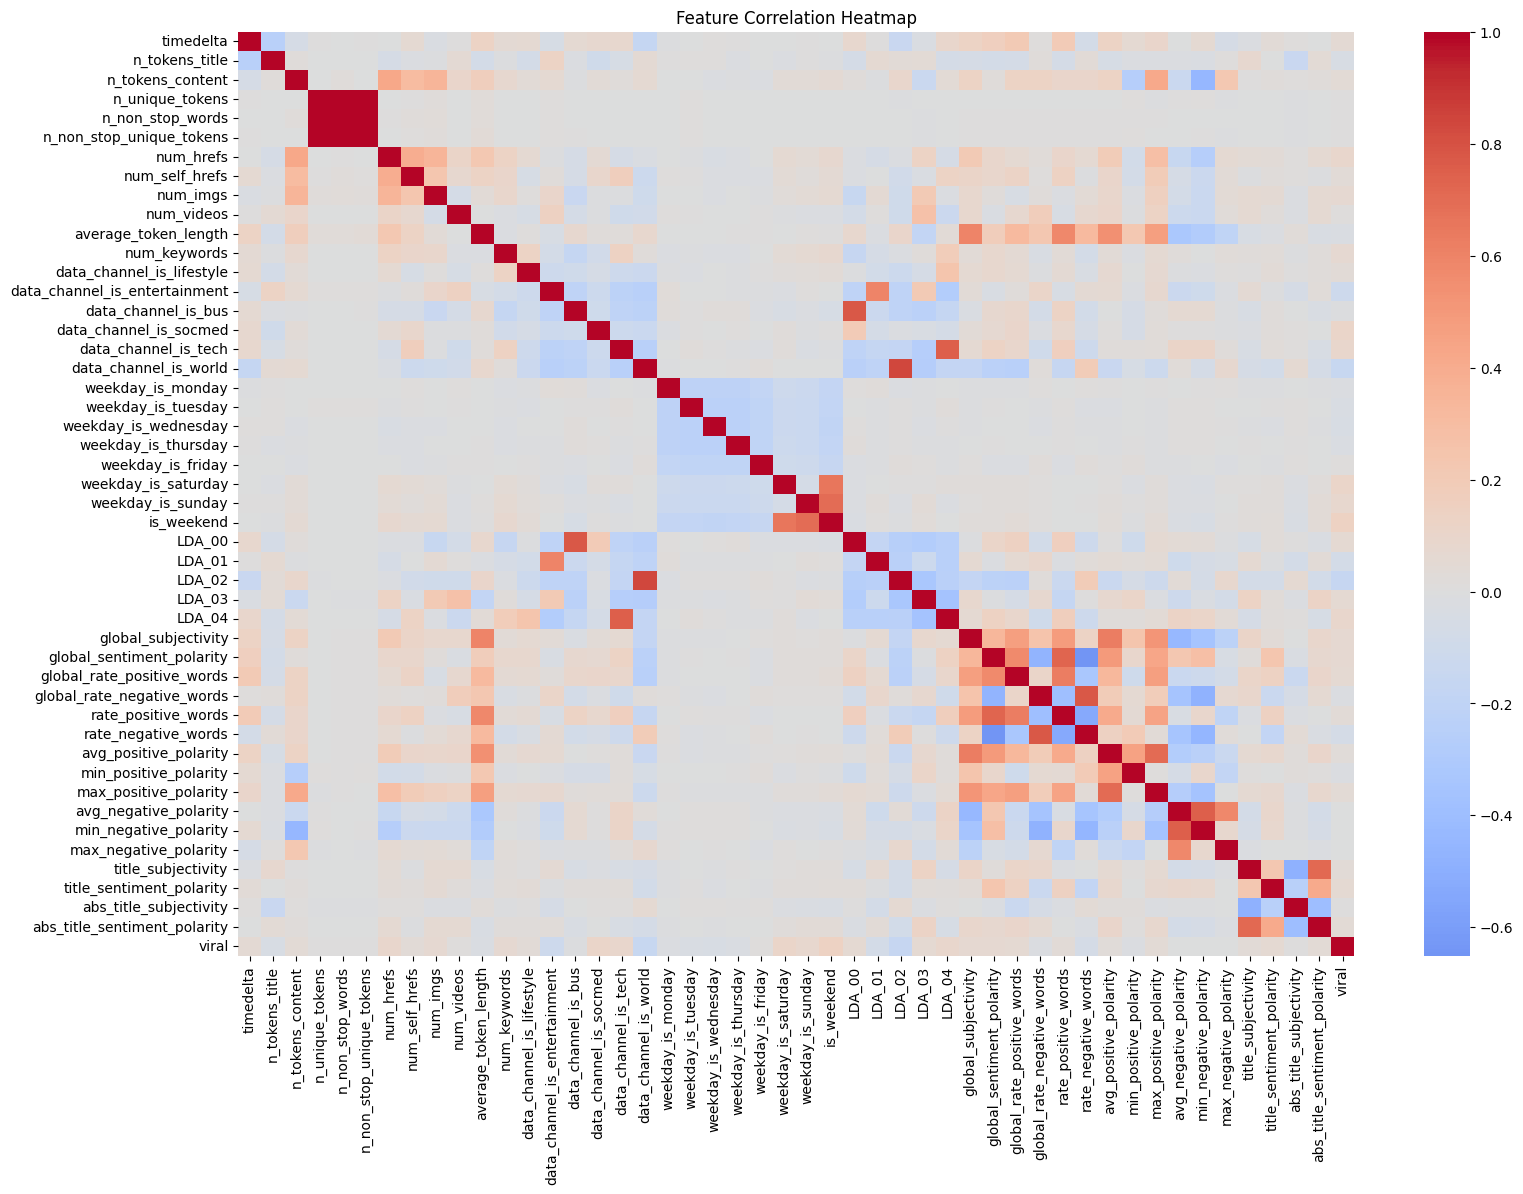

In [6]:
# Correlation heatmap (optional - takes time)
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


In [7]:
print(df.columns.tolist())
df.columns = df.columns.str.strip()  # Removes any leading/trailing spaces


['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_

[]

--- Tuning RandomForest ---
Best params for RandomForest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.660
ROC AUC: 0.718
              precision    recall  f1-score   support

           0       0.65      0.58      0.61      4623
           1       0.67      0.73      0.70      5288

    accuracy                           0.66      9911
   macro avg       0.66      0.65      0.66      9911
weighted avg       0.66      0.66      0.66      9911


--- Tuning LogisticRegression ---
Best params for LogisticRegression: {'clf__C': 1, 'clf__penalty': 'l2'}
Accuracy: 0.655
ROC AUC: 0.706
              precision    recall  f1-score   support

           0       0.64      0.61      0.62      4623
           1       0.67      0.70      0.68      5288

    accuracy                           0.65      9911
   macro avg       0.65      0.65      0.65      9911
weighted avg       0.65      0.65      0.65      9911



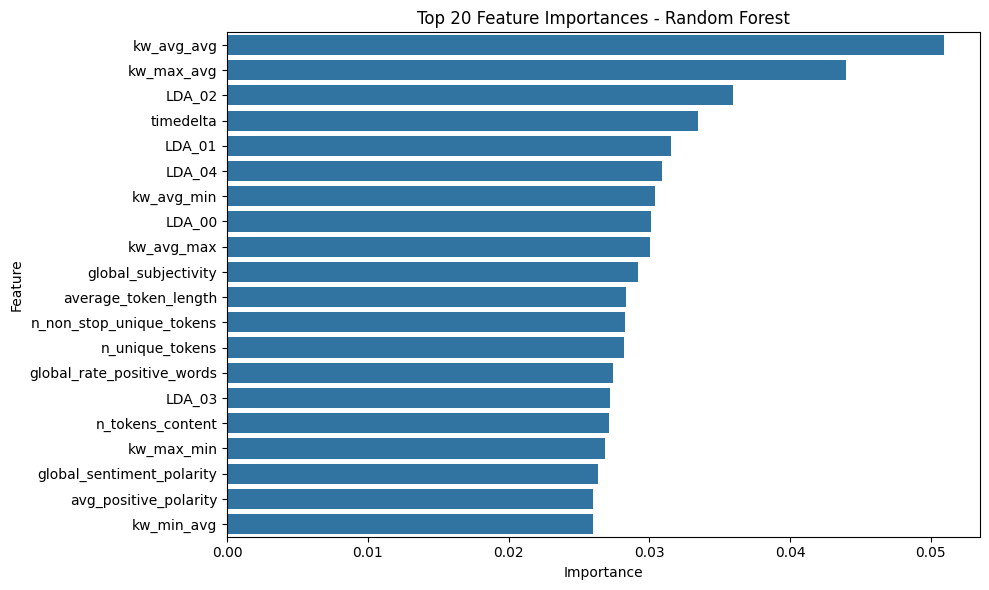

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
df = pd.read_csv('OnlineNewsPopularity.csv')
df.columns = df.columns.str.strip()
df['viral'] = (df['shares'] >= 1400).astype(int)

# Feature engineering: has_viral_terms
viral_keywords = [
    'died', 'death', 'war', 'ukraine', 'israel', 'russia', 'elections',
    'scandal', 'breaking', 'president', 'celebrity', 'fame', 'explosion', 'attack', 'murder'
]

def contains_viral_terms(text):
    text = str(text).lower()
    return int(any(kw in text for kw in viral_keywords))

df['has_viral_terms'] = df['url'].apply(contains_viral_terms)

cheating_features = [
    'shares', 'url',
    'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess'
]

# Drop only if present
df = df.drop(columns=[col for col in cheating_features if col in df.columns])

# Optional: Check for any remaining 'shares' columns
print([col for col in df.columns if 'shares' in col])

# Drop non-numeric/leak columns
X = df.drop(columns=['viral'])
y = df['viral']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Define models and hyperparameters
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10],
            'min_samples_split': [2, 5]
        }
    },
    'LogisticRegression': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', LogisticRegression(max_iter=1000, random_state=42))
        ]),
        'params': {
            'clf__C': [0.1, 1, 10],
            'clf__penalty': ['l2']
        }
    }
}

best_models = {}

for name, m in models.items():
    print(f"\n--- Tuning {name} ---")
    grid = GridSearchCV(m['model'], m['params'], cv=3, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    print(f"Best params for {name}: {grid.best_params_}")
    y_pred = grid.predict(X_test)
    y_proba = grid.predict_proba(X_test)[:, 1]
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.3f}")
    print(classification_report(y_test, y_pred))
    
    best_models[name] = grid.best_estimator_

# Visualize feature importance for Random Forest
if 'RandomForest' in best_models:
    rf = best_models['RandomForest']
    importances = rf.feature_importances_
    feat_names = X.columns
    feat_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10,6))
    sns.barplot(x='Importance', y='Feature', data=feat_df.head(20))
    plt.title("Top 20 Feature Importances - Random Forest")
    plt.tight_layout()
    plt.show()

In [17]:
print([col for col in df.columns if 'shares' in col])
import joblib

# Save the trained Random Forest model from best_models
joblib.dump(best_models['RandomForest'], "random_forest_model.pkl")
import os
print(os.getcwd())


[]
/home/darkness/Documents/ML/our project


In [12]:
import pandas as pd
import joblib

# 1. Load new dataset
new_df = pd.read_csv("business_data.csv")  # Replace with your actual file path
new_df.columns = new_df.columns.str.strip()

# 2. Create 'has_viral_terms' feature from the 'url'
viral_keywords = ['died', 'death', 'war', 'killed', 'shocking', 'amazing', 'exclusive',
                  'revealed', 'disaster', 'tragedy', 'massive', 'attack', 'accident',
                  'explosion', 'celebrity', 'viral', 'broke', 'fired']

def contains_viral_terms(text):
    text = str(text).lower()
    return int(any(word in text for word in viral_keywords))

new_df['has_viral_terms'] = new_df['url'].apply(contains_viral_terms)

# 3. Add dummy/estimated values for the features your model was trained on
# (This assumes your original model was trained on a dataset with these features)
new_df['timedelta'] = 300  # Example default, tweak if needed
new_df['n_tokens_title'] = new_df['headlines'].apply(lambda x: len(str(x).split()))
new_df['n_tokens_content'] = new_df['content'].apply(lambda x: len(str(x).split()))
new_df['num_hrefs'] = 5  # Placeholder
new_df['num_imgs'] = 1  # Placeholder
new_df['average_token_length'] = new_df['content'].apply(lambda x: sum(len(w) for w in str(x).split()) / (len(str(x).split()) + 1))

# 4. Select features used in training
# Get the feature names used during training
expected_features = list(X_train.columns)

# Add missing columns with default value 0
for col in expected_features:
    if col not in new_df.columns:
        new_df[col] = 0

# Ensure correct order of columns
X_new = new_df[expected_features]

# 5. Load the trained model
model = joblib.load("random_forest_model.pkl")  # Path to your saved model

# 6. Predict
predictions = model.predict(X_new)
probabilities = model.predict_proba(X_new)[:, 1]  # Likelihood of being viral

# 7. Add predictions to dataframe
new_df['predicted_viral'] = predictions
new_df['viral_probability'] = probabilities

# 8. Show results
print(new_df[['headlines', 'predicted_viral', 'viral_probability']])


                                              headlines  predicted_viral  \
0     Nirmala Sitharaman to equal Morarji Desai’s re...                1   
1     ‘Will densify network, want to be at least no....                1   
2     Air India group to induct an aircraft every si...                1   
3     Red Sea woes: Exporters seek increased credit ...                0   
4     Air India group to induct a plane every 6 days...                1   
...                                                 ...              ...   
1995  Two official teams from India, EU to discuss c...                0   
1996  Adani family sells $1 billion stake to GQG, ot...                0   
1997  Housing sales up 8% in April-June period acros...                0   
1998  Spike in tomato prices temporary; rates will c...                0   
1999  Benchmark indices touch new highs: Sensex cros...                0   

      viral_probability  
0              0.512375  
1              0.500137  
2        

In [20]:
import pandas as pd
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# 1. Load new, unseen article data
df_new = pd.read_csv("business_data.csv")  # This must be in the same format as original before training

# 2. Load the saved model
model = joblib.load("random_forest_model.pkl")

# 3. Preprocessing functions (must be same as used during training)
def preprocess_data(df):
    df = df.copy()

    # Example of engineered features during training
    df['has_viral_terms'] = df['headlines'].str.contains('shocking|amazing|breaking|secret', case=False, na=False).astype(int)
    df['n_tokens_title'] = df['headlines'].fillna("").apply(lambda x: len(x.split()))
    df['n_tokens_content'] = df['content'].fillna("").apply(lambda x: len(x.split()))
    df['kw_min_min'] = df['content'].str.len() % 100  # mock feature

    # Simulate other numeric features with zeros (you should compute them if you can)
    for col in ['n_unique_tokens', 'n_non_stop_words', 'num_hrefs', 'num_imgs', 
                'avg_positive_polarity', 'avg_negative_polarity', 'title_sentiment_polarity']:
        df[col] = 0

    # Drop non-numeric columns (or encode them if used in training)
    df = df.drop(columns=['category', 'content', 'description', 'headlines'], errors='ignore')

    return df

# 4. Apply preprocessing
X_new = preprocess_data(df_new)

# 5. Make sure columns match what model was trained on
expected_features = model.feature_names_in_
X_new = X_new.reindex(columns=expected_features, fill_value=0)

# 6. Predict
predictions = model.predict(X_new)
probabilities = model.predict_proba(X_new)[:, 1]

# 7. Append predictions to the DataFrame
df_new['predicted_viral'] = predictions
df_new['viral_probability'] = probabilities

# 8. Save or display results
df_new.to_csv("new_articles_with_predictions.csv", index=False)
print(df_new[['predicted_viral', 'viral_probability']].head())


   predicted_viral  viral_probability
0                0           0.490685
1                0           0.492792
2                0           0.478601
3                0           0.474018
4                0           0.481696


In [19]:
newe_df = pd.read_csv("realworld_predictions_fixed.csv")  # Replace with your actual file path
print(f"Shape: {df.shape}")
print(df.dtypes.value_counts())

# Missing values?
print(df.isnull().sum().sort_values(ascending=False))

# Summary statistics
df.describe()


Shape: (2000, 61)
int64      58
object      2
float64     1
Name: count, dtype: int64
headlines              0
weekday_is_tuesday     0
weekday_is_thursday    0
weekday_is_friday      0
weekday_is_saturday    0
                      ..
kw_max_max             0
kw_avg_max             0
kw_min_avg             0
kw_max_avg             0
viral_probability      0
Length: 61, dtype: int64


,has_viral_terms,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,predicted_viral,viral_probability
count,2000.000000,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,...,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.000000,2000.000000
mean,0.041500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.958500,0.501447
std,0.199493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.199493,0.000997
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.496655
25%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.501655
50%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.501655
75%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.501655
max,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.501655
